# Mushroom Edibility Dataset

## Contents
* DataSet
* Description
* Evaluation
* Data Set
* Import Data
* Explore the Data

## Import Data

In [61]:
import pandas as pd
import numpy as np
import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

mushroomDf = pd.read_csv('data/mushrooms.csv')

### Description Of Data

In [62]:
mushroomDf.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Info Of Data

In [63]:
mushroomDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

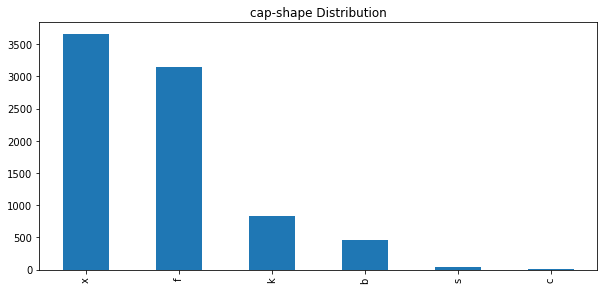

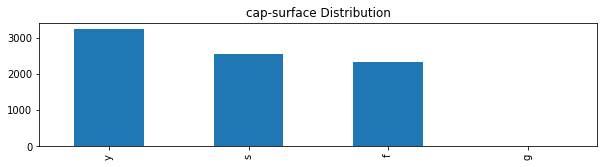

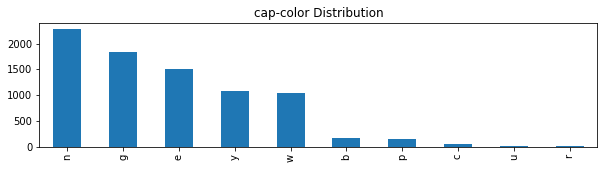

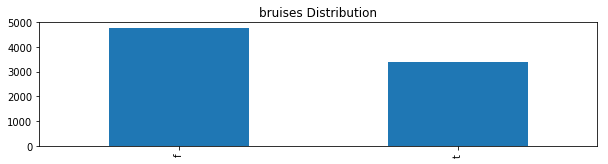

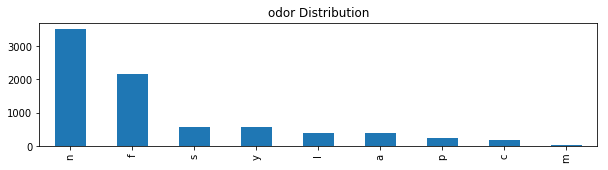

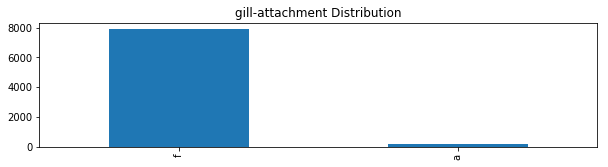

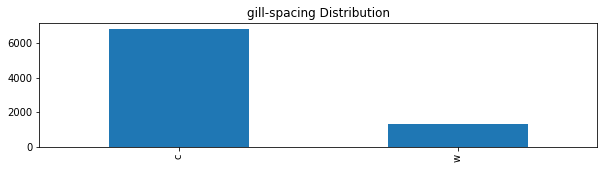

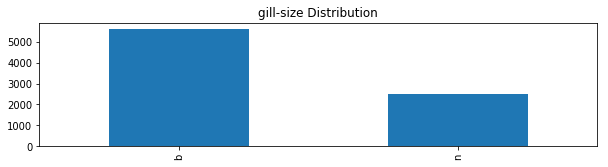

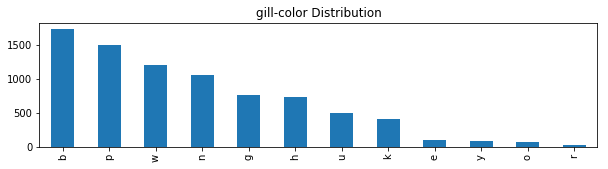

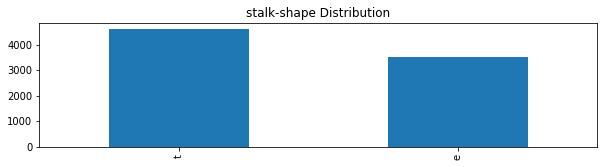

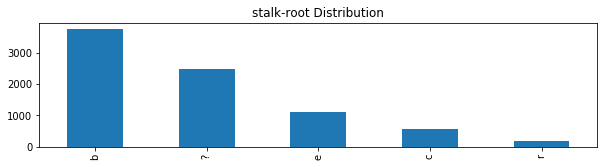

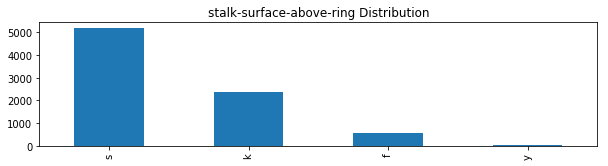

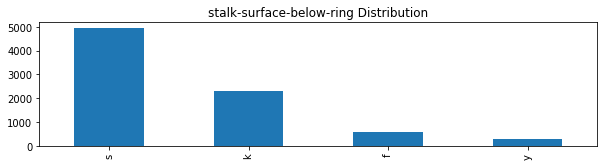

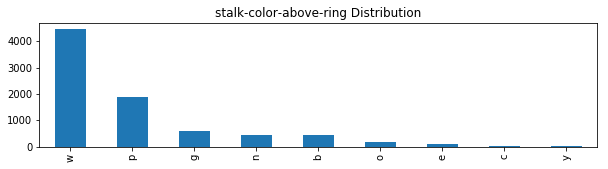

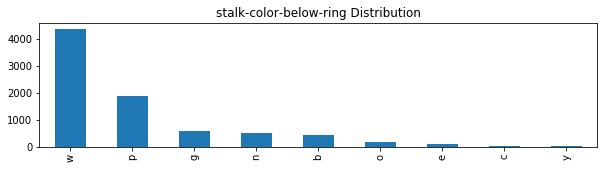

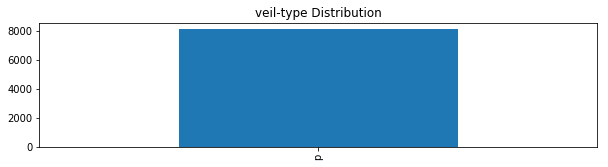

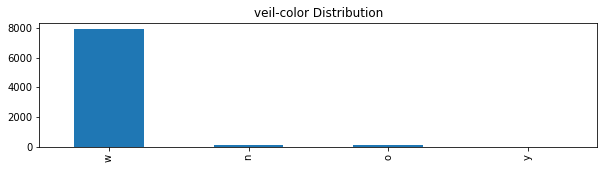

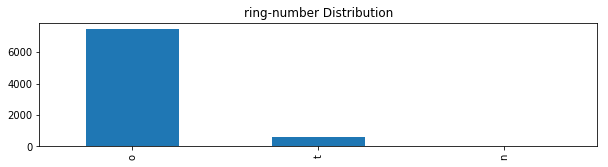

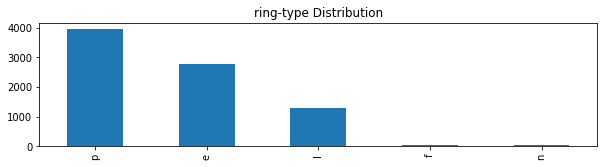

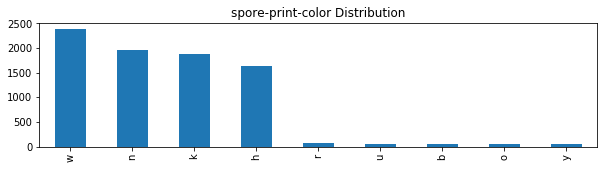

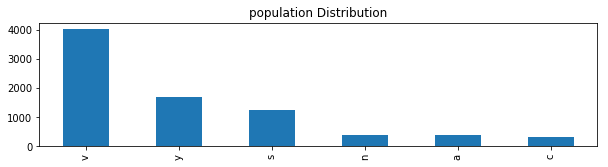

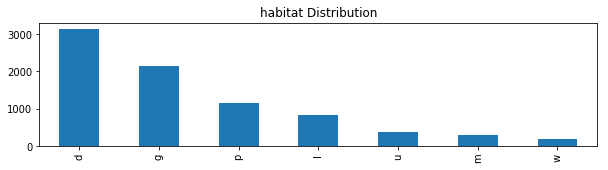

In [64]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 

features = mushroomDf.drop(['class'], axis=1)

fig_dims = (2, 1)

for column in features:
    plt.subplot2grid(fig_dims, (0,0))
    mushroomDf[column].value_counts().plot(kind='bar', title=column + ' Distribution')
    plt.show()


As seen above graphs, we can eliminate feature veil-type which has only one unique value

In [65]:
for column in features:
    print(pd.crosstab(mushroomDf['class'], mushroomDf[column]))
    print('\n===================================================\n')

cap-shape    b  c     f    k   s     x
class                                 
e          404  0  1596  228  32  1948
p           48  4  1556  600   0  1708


cap-surface     f  g     s     y
class                           
e            1560  0  1144  1504
p             760  4  1412  1740


cap-color    b   c    e     g     n   p   r   u    w    y
class                                                    
e           48  32  624  1032  1264  56  16  16  720  400
p          120  12  876   808  1020  88   0   0  320  672


bruises     f     t
class              
e        1456  2752
p        3292   624


odor     a    c     f    l   m     n    p    s    y
class                                              
e      400    0     0  400   0  3408    0    0    0
p        0  192  2160    0  36   120  256  576  576


gill-attachment    a     f
class                     
e                192  4016
p                 18  3898


gill-spacing     c     w
class                   
e             3008  12

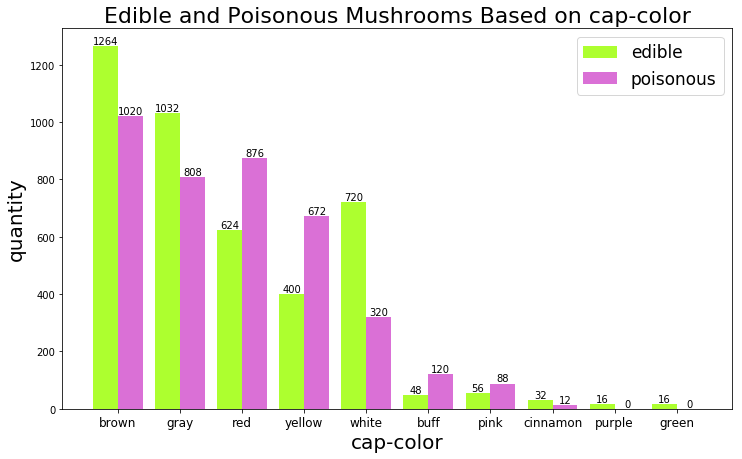

In [69]:
# comparing quantities of edible and poisionous mushrooms on basis of cap color

def autolabel(rects,fontsize=14):
    #Attach a text label above each bar displaying its height
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)

feature = 'cap-color'
features = mushroomDf[feature].value_counts()

m_height = features.values.tolist() 
features.axes 

feature_labels = features.axes[0].tolist() 

poisonous_cc = []
edible_cc = []   

for featureValue in feature_labels:
    size = len(mushroomDf[mushroomDf[feature] == featureValue].index)
    edibles = len(mushroomDf[(mushroomDf[feature] == featureValue) & (mushroomDf['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)

#PLOT Preparations and Plotting

ind = np.arange(10) 
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_cc, width, color='#DA70D6')


#Add some text for labels, title and axes ticks

ax.set_xlabel(feature, fontsize=20)
ax.set_ylabel('quantity', fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on ' + feature, fontsize=22)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)

ax.legend((edible_bars, poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()

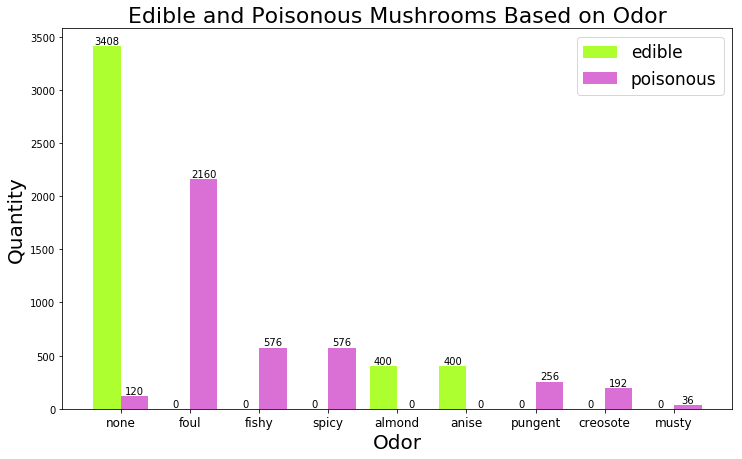

[3408, 0, 0, 0, 400, 400, 0, 0, 0]
[120, 2160, 576, 576, 0, 0, 256, 192, 36]


In [72]:
#Obtain total number of mushrooms for each 'odor'
feature = 'odor'
odors = mushroomDf[feature].value_counts()
odor_height = odors.values.tolist()
odor_labels = odors.axes[0].tolist() 

#comparing quantities of edible and poisionous mushrooms on basis of odor

poisonous_od = []
edible_od = []   
for odor in odor_labels:
    size = len(mushroomDf[mushroomDf['odor'] == odor].index)
    edibles = len(mushroomDf[(mushroomDf['odor'] == odor) & (mushroomDf['class'] == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)
                        
#PLOT Preparations and Plotting

ind = np.arange(9) 
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_od , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='#DA70D6')


#Add some text for labels, title and axes ticks

ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22)
ax.set_xticks(ind + width / 2) 
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible_od)
print(poisonous_od)
